***EDA ON AUTOMOBILE DATASET***

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis based on Manufacturer**](#section501)<br>
    - 5.1.1 [How many types of different Make available and there count?](#section50101)<br>
    - 5.1.2 [How many cars with different door size?](#section50102)<br>
    - 5.1.3 [What are the different body styles ?](#section50103)<br>
    - 5.1.4 [What is most preferred is it Gas or diesel](#section50104)<br>
    - 5.1.5 [What is most preferred engine type ?](#section50105)<br><br>
  - 5.2 [**Analysis based on pricing**](#section502)<br>
      - 5.2.1 [Which manufacturer makes most expensive car?](#section50201)<br>
      - 5.2.2 [Which Bodytype are more expensive?](#section50202)<br>
      - 5.2.3 [How size of an engine increase the price?](#section50203)<br><br>
   - 5.3 [**Analysis based on car performance?**](#section503)<br>
      - 5.3.1 [Which make has the best mileage in city and highway?](#section50301)<br>
   - 5.4 [**Analysis based on Risk associated with the Body style of make?**](#section504)<br>
       - 5.4.1 [Which types body styles highlight more risk for losses ?](#section50401)<br>
       - 5.4.2 [Correlations](#section50402)<br>
    
  - 
6. [Conclusion](#section600)<br>
  - 6.1 [Actionable Insights](#section601)

<a id=section1></a>
## 1. Problem Statement

To understand the varience in the pricing of the cars based on different vehicle parameters and risk associated with the car.

<a id=section2></a>
## 2. Importing Packages

Imported below packages for Analysis and Visualisation

In [40]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots

In [42]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## 3. Loading Data

Automobile_dataset:This dataset contains the information about different vehicle parameters for price recognition  for multiple automobile manufacturer.

#### Importing AutoMobile Dataset

In [43]:


df_automobile=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Automobile_data.csv')
df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


<a id=section301></a>
### Description of the Dataset

- This dataset consist of data From 1985 Ward's Automotive Yearbook
- This dataset provides different pricing range for the differnet makes accordingto the differnet charactrastic of a make and risk associated with it interms of symboling and normilization.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
symboling                        |   
normalized-losses                |
make                             | Manufacturer 
fuel-type                        | Gas,disel etc.
aspiration                       | 
num-of-doors                     | Doors of cars
body-style                       |
drive-wheels                     | 
engine-location                  |
wheel-base                       |
length                           |
width                            |
height                           |
curb-weight                      | weight of the vehicle without the weight of the passenge 
engine-type                      |
num-of-cylinders                 |
engine-size                      |
fuel-system                      |
bore                             |
stroke                           |
compression-ratio                |  
horsepower                       |measure of the power of the engine
peak-rpm                         |Reolutions/rotation per minute
city-mpg                         | Milage in the City 
highway-mpg                      | Milage on highway
price                            | Price of maek               
                                                                  

In [44]:
df_automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

-'''info''' function gives us the following insights into the df_menu dataframe:
- There are a total of 205 samples (rows) and 26 columns in the dataframe.
- There are 10 columns with a numeric datatype and 16 columns with an object datatype.
- There are 0 missing values in the data.
- There are total 25 different features of Car, we need to find out wich feature has maximum impact on the price.

In [45]:
df_automobile.describe()


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


  - There are outliers in the column engine size, compression ration , ciry and highway mpg when we compare Max and 75%.
  
  - The values of Mean and Mediun are close to each other for almost all the columns


<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling beforep reprocessing.html__. 


In [46]:
import pandas_profiling

Report_prepprocess=df_automobile.profile_report(title="Automobile profiling before data Preprocessing ")
Report_prepprocess.to_file(output_file="Automobile profiling before data Preprocessing.html")


- Columns like normalized-losses, price,num-of-doors contains special character ? , this character need to be replaced with the mean , 
  as we dont want to delete rows/records.

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

In [8]:
#df_automobile[~(df_automobile['normalized-losses']=='?')]['normalized-losses'].mean()

NL=df_automobile ['normalized-losses'].loc[df_automobile['normalized-losses'] != '?']
NL


3      164
4      164
6      158
8      158
10     192
11     192
12     188
13     188
18     121
19     98 
20     81 
21     118
22     118
23     118
24     148
25     148
26     148
27     148
28     110
29     145
30     137
31     137
32     101
33     101
34     101
35     110
36     78 
37     106
38     106
39     85 
       .. 
170    134
171    134
172    134
173    65 
174    65 
175    65 
176    65 
177    65 
178    197
179    197
180    90 
182    122
183    122
184    94 
185    94 
186    94 
187    94 
188    94 
190    256
194    103
195    74 
196    103
197    74 
198    103
199    74 
200    95 
201    95 
202    95 
203    95 
204    95 
Name: normalized-losses, Length: 164, dtype: object

In [9]:
NL_Mean=NL.astype(str).astype(int).mean()
NL_Mean

122.0

In [10]:
df_automobile['normalized-losses']=df_automobile['normalized-losses'].replace('?',NL_Mean).astype(int)


In [11]:
df_automobile['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [2]:
Price_N=df_automobile['price'].loc[df_automobile['price']!='?']
Price_N

NameError: name 'df_automobile' is not defined

In [13]:
Price_mean=Price_N.astype(str).astype(int).mean()
Price_mean

13207.129353233831

In [55]:
df_automobile['price']=df_automobile['price'].replace('?',Price_mean).astype(int)
df_automobile['price'].value_counts()[0:4]

13207    4
8845     2
7609     2
5572     2
Name: price, dtype: int64

In [56]:
df_automobile['num-of-doors']=df_automobile['num-of-doors'].replace('?','four')
df_automobile['num-of-doors'].head(10)

0    two 
1    two 
2    two 
3    four
4    four
5    two 
6    four
7    four
8    four
9    two 
Name: num-of-doors, dtype: object

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling after preprocessing.html__.

In [57]:
import pandas_profiling
Report_postprocess=df_automobile.profile_report(title="Automobile profiling after  preprocessing ")
Report_postprocess.to_file(output_file="Automobile profiling  after preprocessing.html")

In [58]:
df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


<a id=section5></a>
## 5. Exploratory Data Analysis

<a id=section501></a>
### 5.1 Analysis based on Manufacturer 

<a id=section50102></a>
#### 5.1.1 How many types of different models sold by maker and there count?

In [59]:
df_automobile['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge            9 
mercedes-benz    8 
bmw              8 
plymouth         7 
audi             7 
saab             6 
porsche          5 
isuzu            4 
jaguar           3 
chevrolet        3 
alfa-romero      3 
renault          2 
mercury          1 
Name: make, dtype: int64

Text(0, 0.5, 'Count')

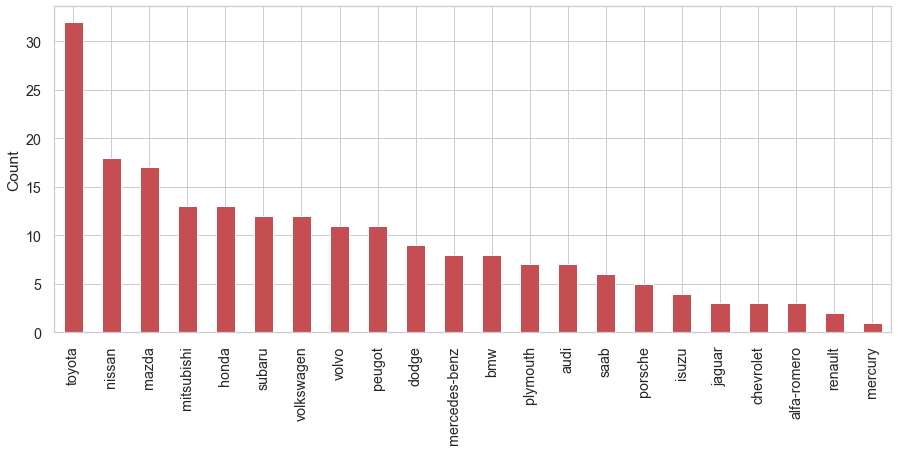

In [60]:
plt.figure(figsize=(15,6))
df_automobile['make'].value_counts().plot(kind='bar',color='r')
plt.ylabel('Count')

This shows that the most selling/popular car/Models is of toyota brand followed by nissan and list popular is mercury .

 <a id=section50101></a>
### 5.1.2 How many cars with different door size

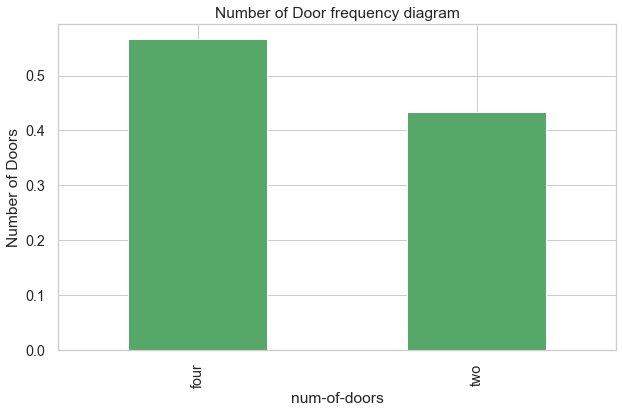

In [61]:
plt.figure(figsize=(10,6))
df_automobile['num-of-doors'].value_counts(normalize=True).plot(kind='bar',color='g')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');


 <a id=section50102></a>
### 5.1.3 What are the different body styles ?

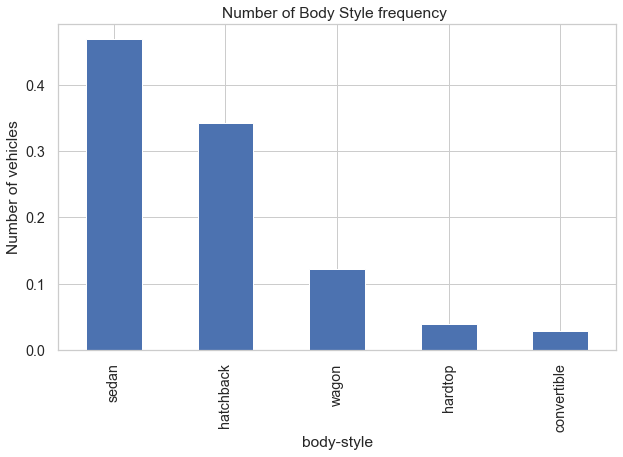

In [62]:
plt.figure(figsize=(10,6))
df_automobile['body-style'].value_counts(normalize=True).plot(kind='bar',color='b')
plt.title("Number of Body Style frequency ")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');


Body style with Sedan has most number of vehicle around 50% followed by around 35%.

 <a id=section50102></a>
### 5.1.4 What is most preferred fuel for the makers ? Is it  Gas or diesel?

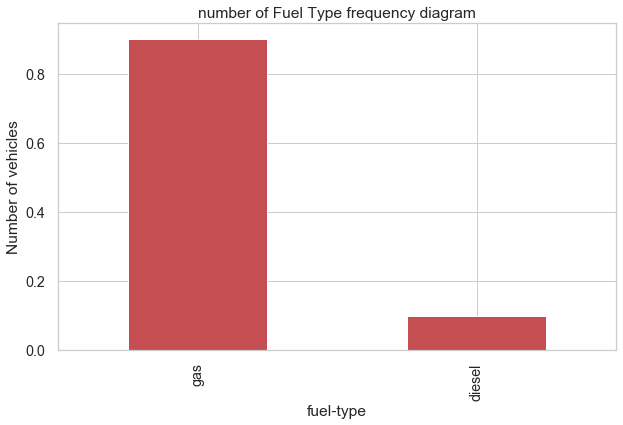

In [63]:
plt.figure(figsize=(10,6))
df_automobile['fuel-type'].value_counts(normalize=True).plot(kind='bar',color='r')
plt.title("number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');

Around 85 % of make prefered gas over diesel.

<a id=section50103></a>
### 5.1.5 Which is the most preferred engine type ?

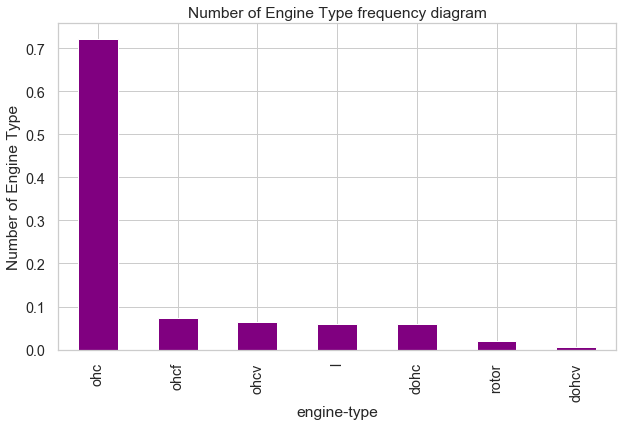

In [64]:
plt.figure(figsize=(10,6))
df_automobile['engine-type'].value_counts(normalize=True).plot(kind='bar',color='purple')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');

More than 70% of vehicle has Ohc engine.

<a id=section502></a>
### 5.2 Analysis based on pricing 


<a id=section50201></a>
### 5.2.1 Which manufacturer makes most expensive car?

Text(0.5, 1.0, 'make vs price')

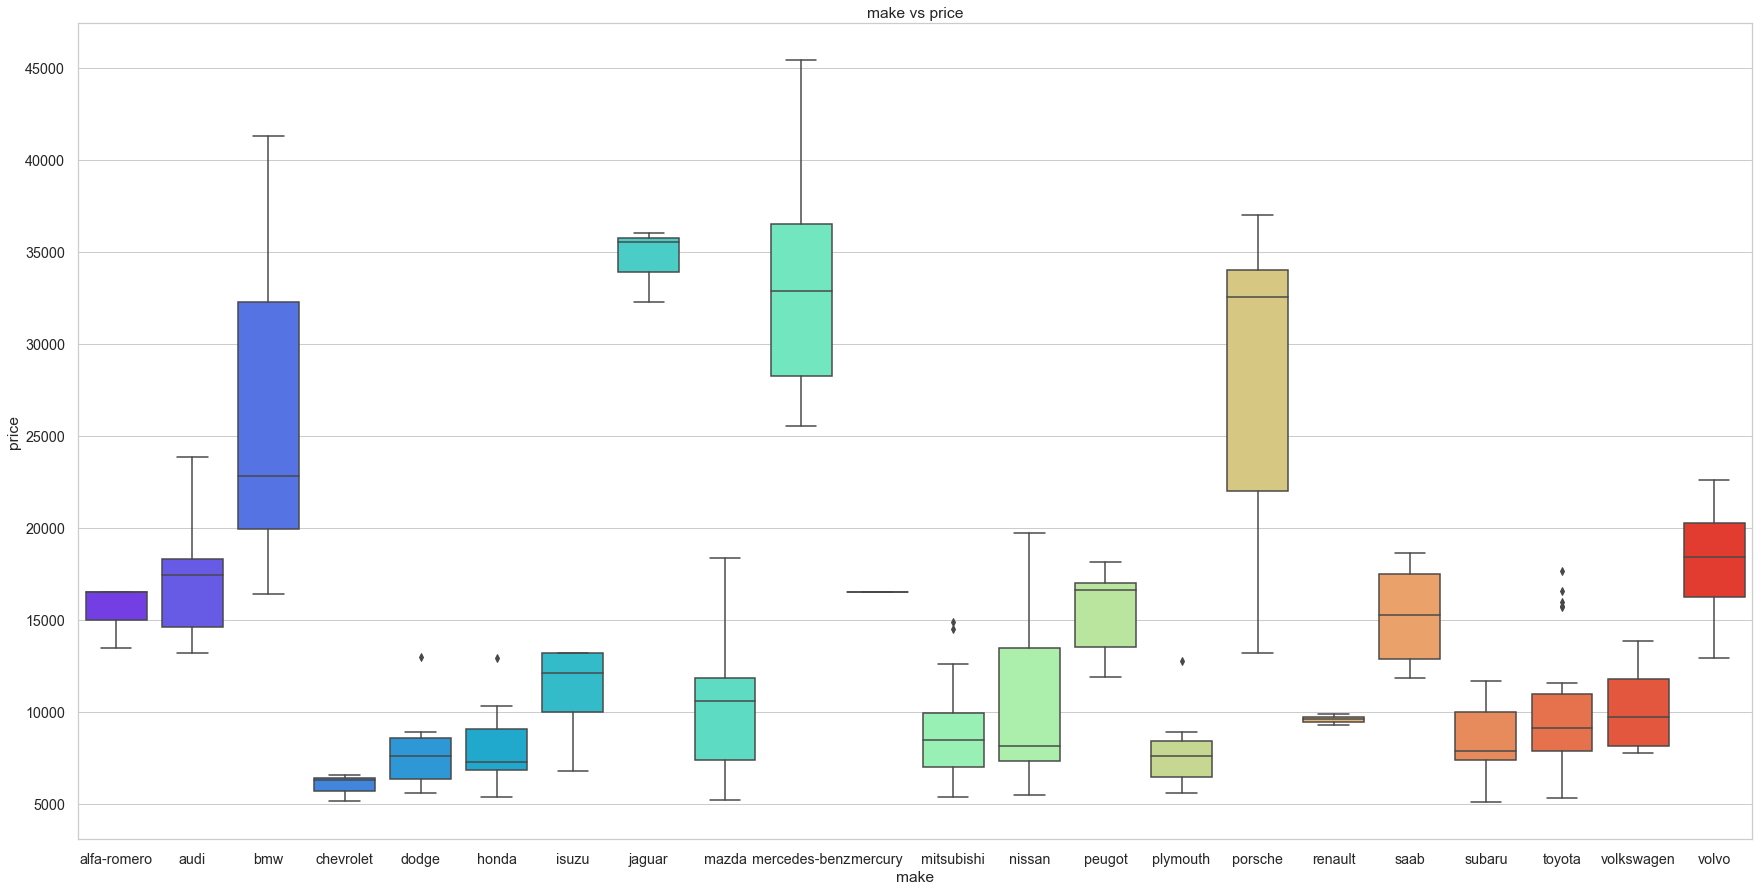

In [66]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df_automobile, x='make', y='price', palette='rainbow')

plt.title('make vs price')

- Most expensive makes  Mercedez-Benz ,BMW, Jaguar, Porshe costs more than 25000.

- Most of the make produces cars with price below 25000

- cheverolet,dodge, honda,mitbushi, nissan,plymouth subaru,toyata has lower price compared to expensive once.


<a id=section50202></a>
### 5.2.2 Which Bodytype are more expensive?

Text(0.5, 1.0, 'Bodystyle vs price')

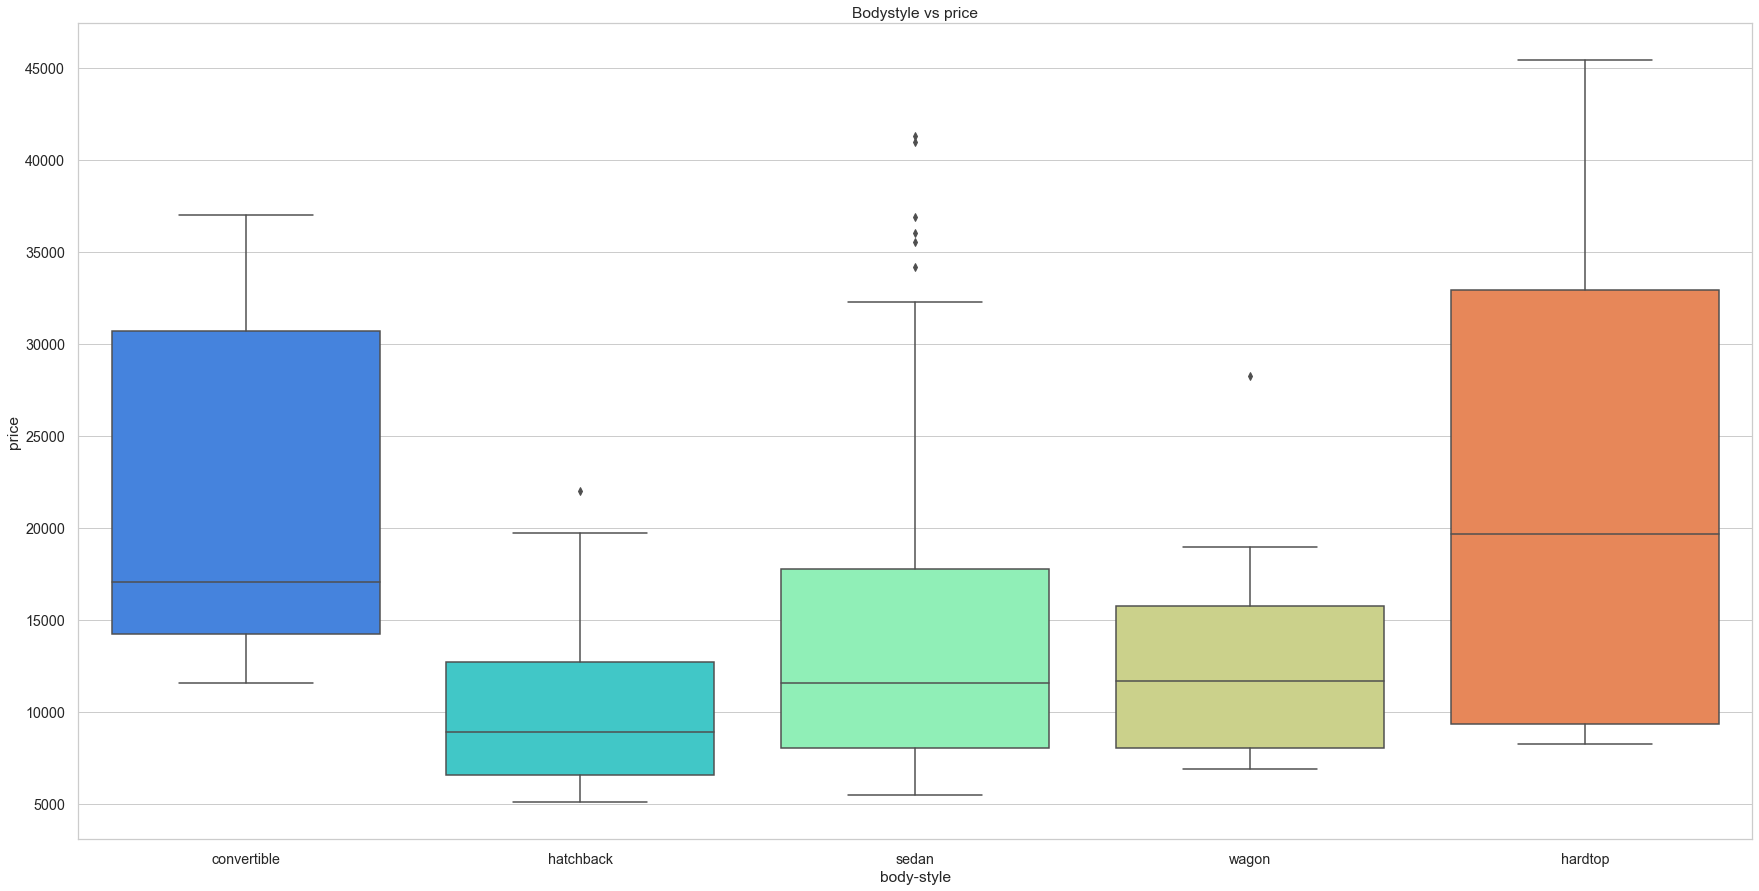

In [67]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df_automobile, x='body-style', y='price', palette='rainbow')

plt.title('Bodystyle vs price')

Hardtop models costs more  followed by convertible and sedan body style

<a id=section50203></a>
### 5.2.3 How size of an engine increase the price?

Text(0.5, 1.0, 'Price vs engine-size')

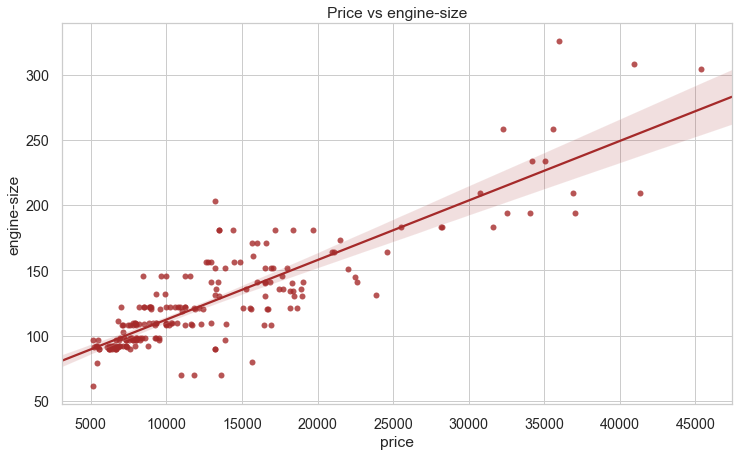

In [68]:
plt.figure(figsize=(12,7))
sns.regplot(data=df_automobile, x='price', y='engine-size', color='brown')

plt.title('Price vs engine-size')

As the enigine size increases the price also incresese. 
Engine size of most of the cars is  in the range  of 100 to 150.

<a id=section503></a>
### 5.3 Analysis based on  performance 

<a id=section50301></a>
####  5.3.1 Which Make has the best mileage in city and highway?

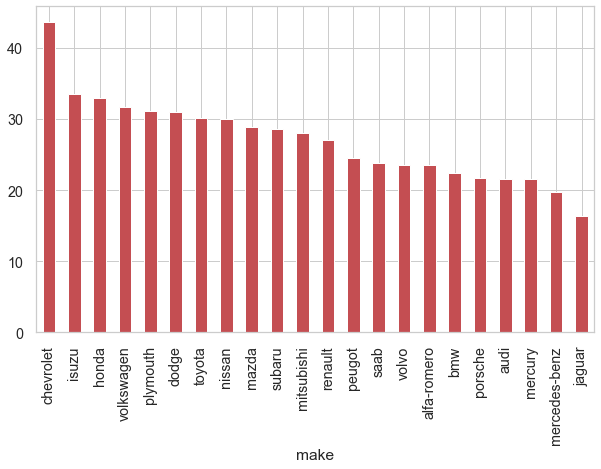

In [69]:
plt.figure(figsize=(10,6))
mileage=df_automobile.groupby(['make']).mean()
mileage['avg-mpg']=((mileage['city-mpg']+mileage['highway-mpg'])/2)
mileage['avg-mpg'].sort_values(ascending=False).plot(kind='bar',color='r')
plt.show()

 
 - The graph shows that  Chevrolet has the highest avg mileage and Jaguar has the lowest.
 
   (calculated the average mileage according to the make by taking the average of city-mpg and highway-mpg)

<a id=section504></a>

### 5.4 Analysis based on Risk associated with the Body style of make?

<a id=section50401></a>
#### 5.4.1 Which types body styles highlight more risk for losses?

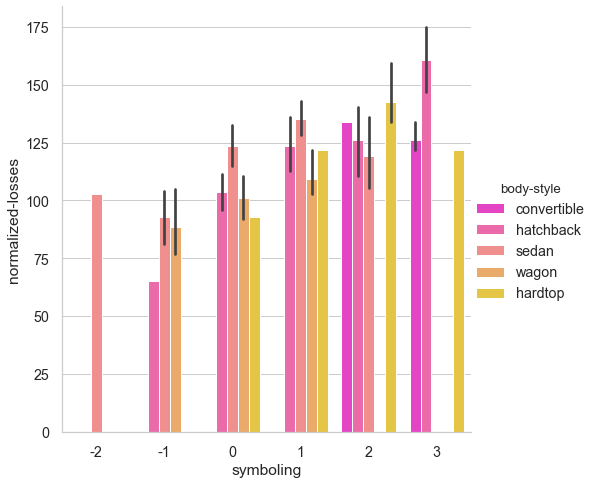

In [70]:
sns.catplot(x='symboling', y='normalized-losses', hue='body-style', data=df_automobile, height=7, kind='bar', 
            palette='spring')

<a id=section50402></a>
#### 5.4.2 Correlations 

Text(0.5, 1, 'Price correlation')

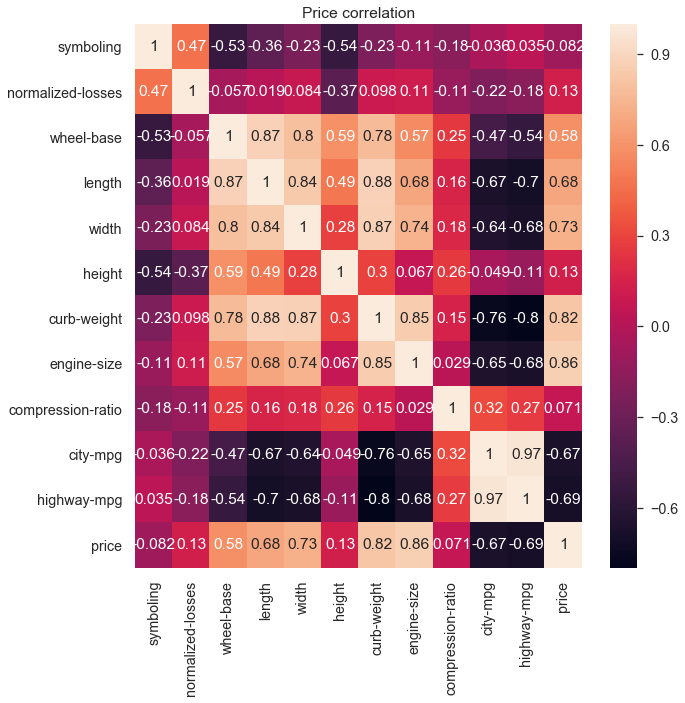

In [71]:
plt.figure(figsize=(10, 10
                   ))
df_automobile = df_automobile.corr()
sns.heatmap(df_automobile, annot=True)
plt.title('Price correlation')

- Curbweight and engine size  has strog corelation with price .

- City and Highway milage has Weak Corelation with price.

  <a id=section600></a>
###  6. Conclusion


- Smalll cars have more sell as there milage is on higher side. Totyota makes high quality small cars and so leading in front.
- The price of the car increases as the engine size of the car increases.
- Hardtop and convertable car has the highest price and normalization loss is also high as the insurance risk is at higher side.


<a id=section601></a>
####  6.1 Actionable Insights



- US car manufucater should increase the production of 
  small segment cars like what Toyota is doing.

-  Reasearch should be done on how to make the engine size 
    small so that the Price of car can be reduced.
